<a href="https://colab.research.google.com/github/hk1912/sentiment-analysis/blob/master/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
ls

 2015_lyp_class_12_informaticas_practice_delhi_out_side_qp.pdf
 20175096.jpg.jpeg
 9-speed-control-of-dc-shunt-motor.doc
 alia.jpeg
'Auto Call Recorder'/
 cat.10704.jpg
 cat.10705.jpg
 cat.10706.jpg
 cat.10707.jpg
 cat.10708.jpg
 cat.10709.jpg
 cat.10710.jpg
 cat.10711.jpg
 cat.10712.jpg
 cat.10713.jpg
 cat.10714.jpg
 cat.10716.jpg
 cat.10718.jpg
 cat.10721.jpg
 cat.10754.jpg
 cat.10755.jpg
 cat.10756.jpg
 cat.10757.jpg
 cat.10758.jpg
 cat.10759.jpg
 cat.10760.jpg
 cat.10761.jpg
 cat.10762.jpg
 cat.10763.jpg
 cat.10764.jpg
 cat.10765.jpg
 cat.10766.jpg
 cat.10767.jpg
 cat.10768.jpg
 cat.10769.jpg
 cat.10770.jpg
 cat.10771.jpg
 cat.10772.jpg
 cat.10773.jpg
 cat.10774.jpg
 cat.10775.jpg
 cat.10779.jpg
 cat.10824.jpg
 cat.10825.jpg
 cat.10826.jpg
 cat.10827.jpg
 cat.10828.jpg
 cat.10829.jpg
 cat.10830.jpg
 cat.10831.jpg
 cat.10832.jpg
 cat.10833.jpg
 cat.10834.jpg
 cat.10835.jpg
 cat.10837.jpg
 cat.10838.jpg
 cat.10842.jpg
 Classroom/
'Colab Notebooks'/
 cvd1.h5
 cvd3.h5
 cvd.h25
 cvd.h5


In [0]:
cd gdrive/My Drive

/content/gdrive/My Drive


In [0]:
data = pd.read_csv('Tweets.csv')
data = data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head() 

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,568058934428372992,positive,1.0,NaN,NaN,United,NaN,andtheretheygo,NaN,0,"@united Great, thank you!",NaN,2015-02-18 06:46:18 -0800,NaN,NaN
1,569656230769262592,positive,1.0,NaN,NaN,American,NaN,SavageRoyal,NaN,0,@americanair @bershawnjackson big UPS to Newar...,NaN,2015-02-22 16:33:23 -0800,Atlanta Ga && Traveling,NaN
2,568823136600371200,negative,1.0,Late Flight,1.0000,Delta,NaN,The_Radifier,NaN,0,@JetBlue sis and 16 month old nephew are. Last...,NaN,2015-02-20 09:22:58 -0800,"Arlington, VA",Atlantic Time (Canada)
3,568002085888897025,negative,1.0,Late Flight,0.6842,US Airways,NaN,RyanMackJ,NaN,0,@USAirways after last night in Charlotte NC I'...,NaN,2015-02-18 03:00:24 -0800,"Milwaukee, WI",NaN
4,569691858365915136,negative,1.0,Late Flight,0.7031,American,NaN,friedrice4break,NaN,0,@AmericanAir guys 5350 in dfw stuck at the ga...,NaN,2015-02-22 18:54:58 -0800,NaN,NaN


In [0]:
data = data[['airline_sentiment', 'text']]
data.head() 

,airline_sentiment,text
0,positive,"@united Great, thank you!"
1,positive,@americanair @bershawnjackson big UPS to Newar...
2,negative,@JetBlue sis and 16 month old nephew are. Last...
3,negative,@USAirways after last night in Charlotte NC I'...
4,negative,@AmericanAir guys 5350 in dfw stuck at the ga...


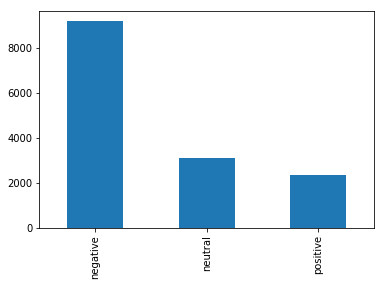

In [0]:
data['airline_sentiment'].value_counts().sort_index().plot.bar() 

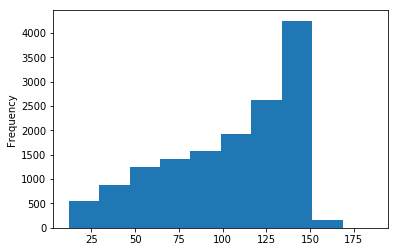

In [0]:
data['text'].str.len().plot.hist() 

In [0]:
data['text'].apply(lambda x: x.lower())
#transform text to lowercase
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['text'].head() 

0                               united Great thank you
1    americanair bershawnjackson big UPS to Newark ...
2    JetBlue sis and 16 month old nephew are Last n...
3    USAirways after last night in Charlotte NC Im ...
4    AmericanAir guys 5350 in dfw  stuck at the gat...
Name: text, dtype: object

In [0]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['text'].values)


In [0]:
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5] 

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    5,  114,   68,    6],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   13,  469, 3098,    1,  528,  108,
         207,    3,   23,  279,  863, 1161,  384,    3,   23,   15, 3670],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   17,   10, 1371,  715,  429, 3671,   35,  129, 2056,    8,
          10,   29,   93,   77,   39,   29,   14, 1257,  250,  267,   69],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,   12,   90,  129,  258,   15,  507, 1258,   48,  430, 4604,
         124,  125,    6,  103,  536,  593,    9,    2,  413,  256, 1204],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   13,  105, 27

In [0]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

W0712 10:30:37.790672 140163957274496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 10:30:37.838006 140163957274496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 10:30:37.846282 140163957274496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 10:30:37.860152 140163957274496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0712 10:30:37.867881 

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary() 

W0712 10:31:01.308724 140163957274496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 10:31:01.508295 140163957274496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 256)           1280000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 33, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [0]:
y = pd.get_dummies(data['airline_sentiment']).values
[print(data['airline_sentiment'][i], y[i]) for i in range(0,5)] 

positive [0 0 1]
positive [0 0 1]
negative [1 0 0]
negative [1 0 0]
negative [1 0 0]


[None, None, None, None, None]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [0]:
batch_size = 32
epochs = 8
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2) 

W0712 10:33:07.568721 140163957274496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/8
 - 43s - loss: 0.6515 - acc: 0.7272
Epoch 2/8
 - 38s - loss: 0.4384 - acc: 0.8303
Epoch 3/8
 - 38s - loss: 0.3509 - acc: 0.8683
Epoch 4/8
 - 38s - loss: 0.2953 - acc: 0.8916
Epoch 5/8
 - 38s - loss: 0.2549 - acc: 0.9051
Epoch 6/8
 - 38s - loss: 0.2089 - acc: 0.9229
Epoch 7/8
 - 39s - loss: 0.1814 - acc: 0.9341
Epoch 8/8
 - 38s - loss: 0.1583 - acc: 0.9425


In [0]:
model.save('sentiment_analysis.h5')

In [0]:
predictions = model.predict(X_test)
[print(data['text'][i], predictions[i], y_test[i]) for i in range(0, 5)] 

united Great thank you [9.9995780e-01 3.6957455e-05 5.2166629e-06] [1 0 0]
americanair bershawnjackson big UPS to Newark airport staff ampamp DDean I was also treated lovely while I was in town  [9.9998951e-01 9.3581257e-06 1.1162828e-06] [1 0 0]
JetBlue sis and 16 month old nephew are Last nights flight and this am mega delayed Now this evenings is starting w delays Why [9.9915743e-01 5.9433578e-04 2.4821574e-04] [1 0 0]
USAirways after last night in Charlotte NC Im seriously debating never flying you again 50 minute on the Tarmac connection leaves [0.39507407 0.01817003 0.58675593] [0 0 1]
AmericanAir guys 5350 in dfw  stuck at the gate for half an hour  Do we pull the slide or what [0.9039004  0.09427395 0.00182562] [0 0 1]


[None, None, None, None, None]

In [0]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1

    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:
        real_neu += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg) 

Positive predictions: 412
Neutral predictions: 582
Negative predictions: 1934
Real positive: 471
Real neutral: 629
Real negative: 1828
